In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import (mean_absolute_error, mean_squared_error, root_mean_squared_error)

# 데이터 로드

In [3]:
train = pd.read_csv('./data/bike_train.csv')
test = pd.read_csv('./data/bike_test.csv')

In [4]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [6]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

(None, None)

In [7]:
train.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,10886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


In [8]:
test.describe(include='all')

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
unique,6493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,NaN,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,NaN,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,NaN,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,NaN,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900


# 데이터 전처리

### 데이터 변환

#### object(문자열)을 datetime으로 변환

In [12]:
train['datetime'] = pd.to_datetime(train['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [13]:
test['datetime'] = pd.to_datetime(test['datetime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [15]:
# 연도, 월, 일, 시간 추출
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
train['year'] = train['datetime'].dt.year

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int32         
 13  day         10886 non-null  int32         
 14  month       10886 non-null  int32         
 15  year        10886 non-null  int32         
dtypes: datetime64[ns](1), 

In [17]:
train = train.drop(columns=['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  hour        10886 non-null  int32  
 12  day         10886 non-null  int32  
 13  month       10886 non-null  int32  
 14  year        10886 non-null  int32  
dtypes: float64(3), int32(4), int64(8)
memory usage: 1.1 MB


In [18]:
# 연도, 월, 일, 시간 추출
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month
test['year'] = test['datetime'].dt.year

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   hour        6493 non-null   int32         
 10  day         6493 non-null   int32         
 11  month       6493 non-null   int32         
 12  year        6493 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(4), int64(5)
memory usage: 558.1 KB


In [20]:
# 데이터 표현 방식 변경
#test['season'] = test['season'].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})
#test['weather'] = test['weather'].map({1:"Sunny", 2:"Cloudy", 3:"Light_Rainy/Snowy", 4:"Heavy_Rainy/Snowy"})
#test.head()

## 결측치

In [22]:
train.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
month         0
year          0
dtype: int64

In [23]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
hour          0
day           0
month         0
year          0
dtype: int64

--> 결측치 없음

## 중복값

In [26]:
train.duplicated().sum()

0

In [27]:
test.duplicated().sum()

0

--> 중복값 없음

## 이상치

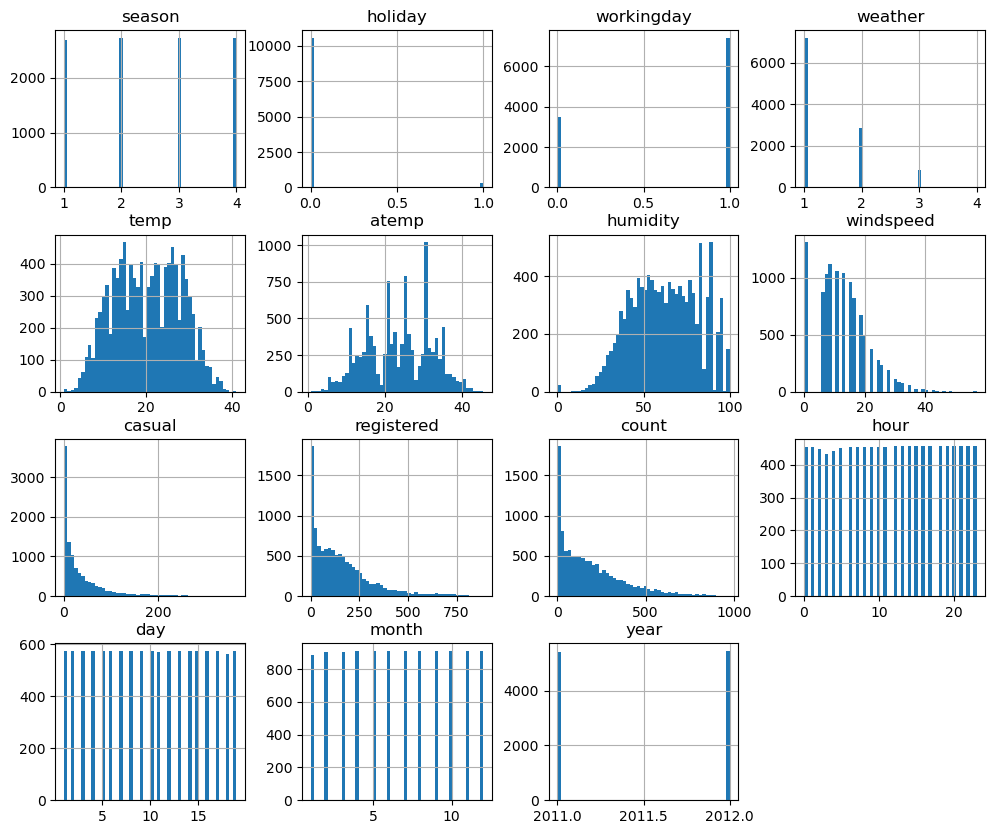

In [30]:
train.hist(figsize=(12, 10), bins=50)
plt.show()

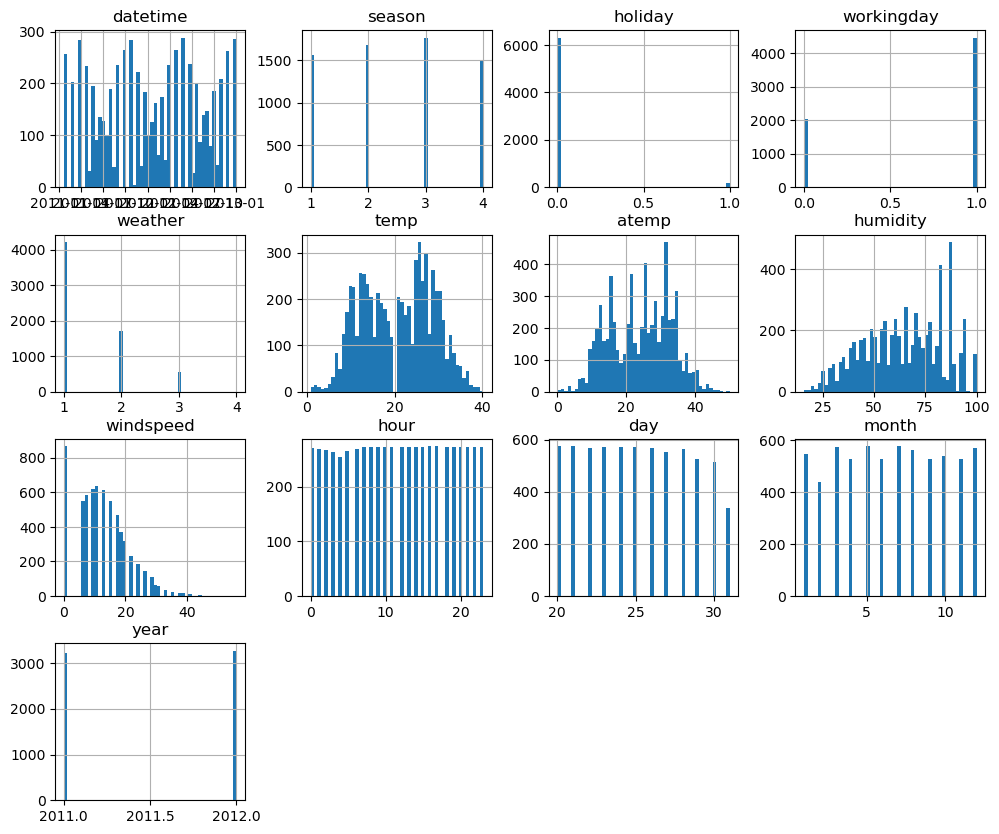

In [31]:
test.hist(figsize=(12, 10), bins=50)
plt.show()

In [1]:
# 이상치 개수 확인
for col in train.columns:
    q1 = train[col].quantile(0.25)
    q3 = train[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    print(f"{col} : {len(outliers)}")

NameError: name 'train' is not defined

In [33]:
for col in test.columns:
    q1 = test[col].quantile(0.25)
    q3 = test[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = test[(test[col] < lower_bound) | (test[col] > upper_bound)]
    print(f"{col} : {len(outliers)}")

datetime : 0
season : 0
holiday : 189
workingday : 0
weather : 2
temp : 0
atemp : 0
humidity : 0
windspeed : 115
hour : 0
day : 0
month : 0
year : 0


In [34]:
def detect_outliers(df, column, method, threshold=1.5):
   
    data = df[column]

    if method == "IQR":
        q1 = data.quantile(0.25)  # 1사분위수
        q3 = data.quantile(0.75)  # 3사분위수
        IQR = q3 - q1
        lower_bound = q1 - (threshold * IQR)
        upper_bound = q3 + (threshold * IQR)
        outliers = df[(data < lower_bound) | (data > upper_bound)]
    
    elif method == "Z-score":
        mean = data.mean()
        std = data.std()
        z_scores = (data - mean) / std
        outliers = df[(np.abs(z_scores) > threshold)]
    
    else:
        raise ValueError("method는 'IQR' 또는 'Z-score' 중 하나여야 합니다.")

    return outliers

--> 이상치 삭제하면 안됨. 

이상치 있는 데이터가 'holiday','weather', 'humidty','windspeed','casual', 'registered','count'를 삭제한다면 데이터 손실이 크기에 삭제하면 안될 것으로 보임.

단, 이상치가 있는 컬럼을 주의해서 봐야한다.

In [36]:
def plot_hist_qq(data, column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # 히스토그램
    sns.histplot(data[column], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {column}")

    # Q-Q 플롯
    stats.probplot(data[column], dist="norm", plot=axes[1])
    axes[1].set_title(f"Q-Q Plot of {column}")

    plt.tight_layout()
    plt.show()

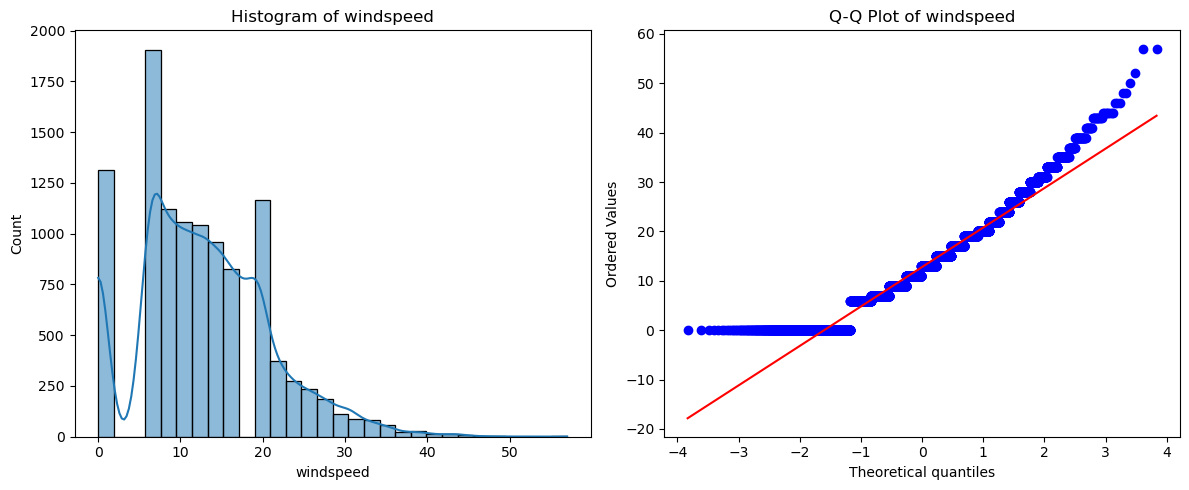

In [37]:
plot_hist_qq(train,'windspeed')

In [38]:
outlier_windspeed = detect_outliers(test, "windspeed", method="IQR")
outlier_windspeed

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
36,2011-01-21 12:00:00,1,0,1,1,9.02,9.090,27,39.0007,12,21,1,2011
37,2011-01-21 13:00:00,1,0,1,1,8.20,7.575,21,39.0007,13,21,1,2011
38,2011-01-21 14:00:00,1,0,1,1,8.20,7.575,25,35.0008,14,21,1,2011
259,2011-02-20 02:00:00,1,0,0,1,9.84,9.850,41,36.9974,2,20,2,2011
260,2011-02-20 03:00:00,1,0,0,1,9.02,9.090,44,36.9974,3,20,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6441,2012-12-29 20:00:00,1,0,0,2,12.30,12.120,56,36.9974,20,29,12,2012
6442,2012-12-29 21:00:00,1,0,0,2,11.48,12.120,56,32.9975,21,29,12,2012
6455,2012-12-30 10:00:00,1,0,0,1,10.66,10.605,41,39.0007,10,30,12,2012
6457,2012-12-30 12:00:00,1,0,0,1,11.48,11.365,36,39.0007,12,30,12,2012


In [39]:
train["windspeed"].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

In [40]:
train["windspeed"].loc[train["windspeed"] > 17 ].value_counts()

windspeed
19.0012    676
19.9995    492
22.0028    372
23.9994    274
26.0027    235
27.9993    187
30.0026    111
31.0009     89
32.9975     80
35.0008     58
39.0007     27
36.9974     22
43.0006     12
40.9973     11
43.9989      8
46.0022      3
56.9969      2
47.9988      2
51.9987      1
50.0021      1
Name: count, dtype: int64

In [41]:
train["windspeed"].loc[train["windspeed"] > 30 ].value_counts()

windspeed
30.0026    111
31.0009     89
32.9975     80
35.0008     58
39.0007     27
36.9974     22
43.0006     12
40.9973     11
43.9989      8
46.0022      3
56.9969      2
47.9988      2
51.9987      1
50.0021      1
Name: count, dtype: int64

In [42]:
train["windspeed"] = np.where(train["windspeed"] >= 30, train["windspeed"].mean() , train["windspeed"])

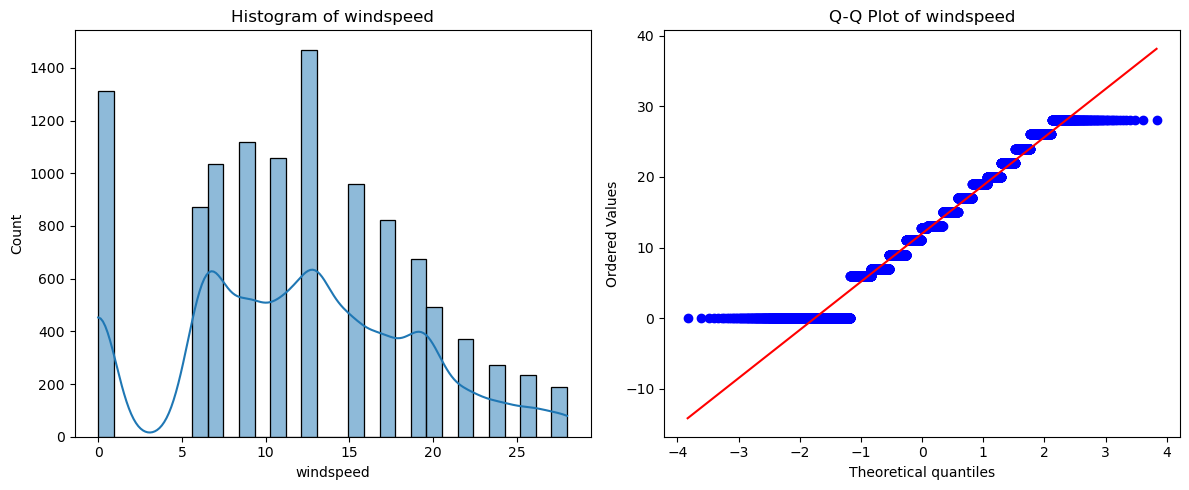

In [43]:
# 이상치 처리 후
plot_hist_qq(train,'windspeed')

In [44]:
train.shape

(10886, 15)

In [48]:
#train['season'] = train['season'].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})
#train['weather'] = train['weather'].map({1:"Sunny", 2:"Cloudy", 3:"Light_Rainy/Snowy", 4:"Heavy_Rainy/Snowy"})

#### 'count' 이상치 확인하기

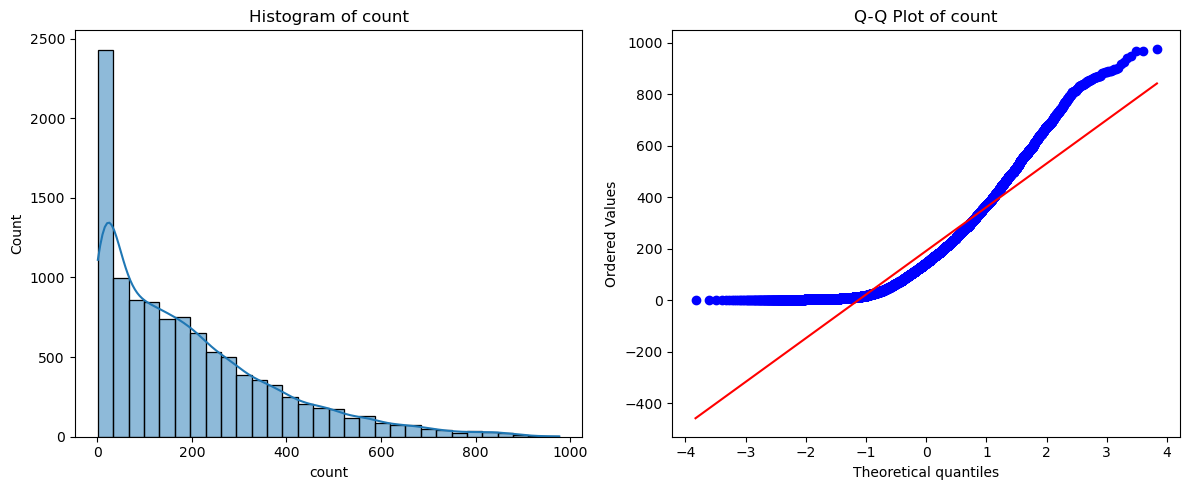

In [50]:
plot_hist_qq(train,'count')

- 그래프 분포를 통해서 positively-skewed임을 알 수 있다.

=> 대부분의 값이 작은 쪽에 몰려있고, 일부 극단적으로 큰 값들이 존재한다는 뜻이다.

In [52]:
outlier_count = detect_outliers(train, "count", method="IQR")
outlier_count

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
6611,1,0,1,2,24.60,31.060,43,12.9980,89,623,712,18,12,3,2012
6634,1,0,1,1,28.70,31.820,37,7.0015,62,614,676,17,13,3,2012
6635,1,0,1,1,28.70,31.820,34,19.9995,96,638,734,18,13,3,2012
6649,1,0,1,1,18.04,21.970,82,0.0000,34,628,662,8,14,3,2012
6658,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,17,14,3,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,0,1,2,13.94,15.150,61,19.9995,16,708,724,8,11,12,2012
10702,4,0,1,2,10.66,12.880,65,11.0014,18,670,688,8,12,12,2012
10726,4,0,1,1,9.84,11.365,60,12.9980,24,655,679,8,13,12,2012
10846,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,8,18,12,2012


In [53]:
outlier_count['hour'].value_counts()

hour
17    94
18    78
8     76
13    15
12    10
19     8
15     7
14     6
16     6
Name: count, dtype: int64

Text(0.5, 0, 'hour')

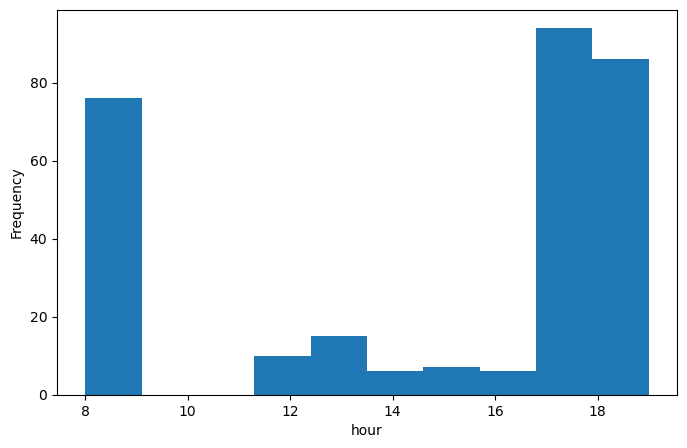

In [54]:
outlier_count['hour'].plot(kind='hist', figsize=(8, 5))
plt.xlabel('hour')

'count'컬럼에서 이상치는 대부분 출퇴근 시간대에 분포되어 있고 나머지는 점심시간과 오후에 분포되어 있다.

#### 등록의 유무에 따른 시간별 이상치 확인

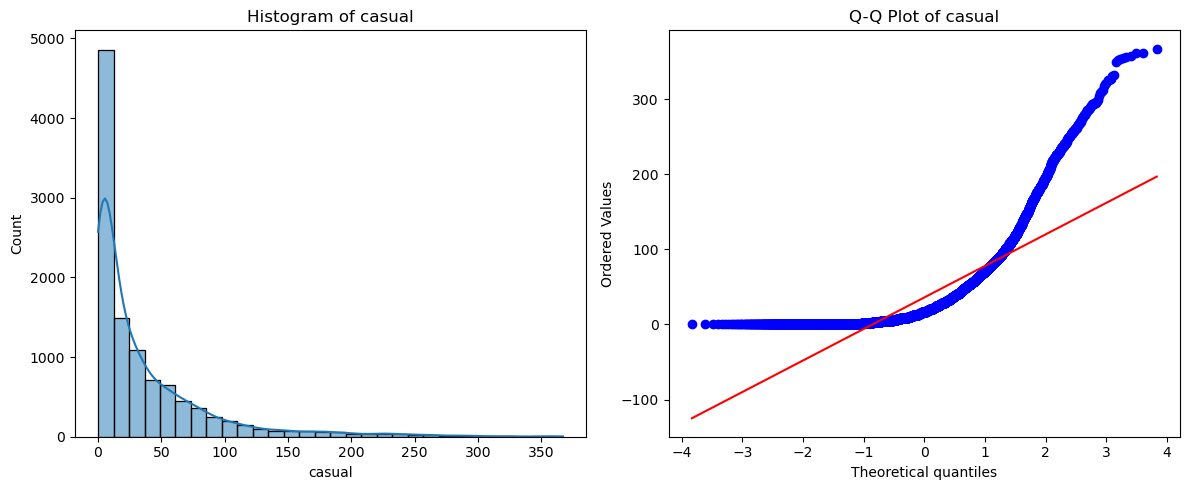

In [57]:
# 등록되지 않은 사용자의 대여 수의 이상치
plot_hist_qq(train,'casual')

In [58]:
outlier_casual = detect_outliers(train, "casual", method="IQR")
outlier_casual

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
1173,1,0,0,1,18.86,22.725,41,19.999500,144,106,250,14,13,3,2011
1174,1,0,0,1,19.68,23.485,39,22.002800,149,155,304,15,13,3,2011
1175,1,0,0,1,18.86,22.725,41,26.002700,124,132,256,16,13,3,2011
1311,1,0,0,1,18.86,22.725,33,27.999300,126,141,267,12,19,3,2011
1312,1,0,0,1,20.50,24.240,34,12.799395,174,127,301,13,19,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,4,0,0,2,16.40,20.455,87,15.001300,122,364,486,12,8,12,2012
10611,4,0,0,2,16.40,20.455,87,11.001400,148,399,547,13,8,12,2012
10612,4,0,0,2,16.40,20.455,87,19.001200,164,378,542,14,8,12,2012
10613,4,0,0,1,17.22,21.210,82,11.001400,167,374,541,15,8,12,2012


Text(0.5, 0, 'hour')

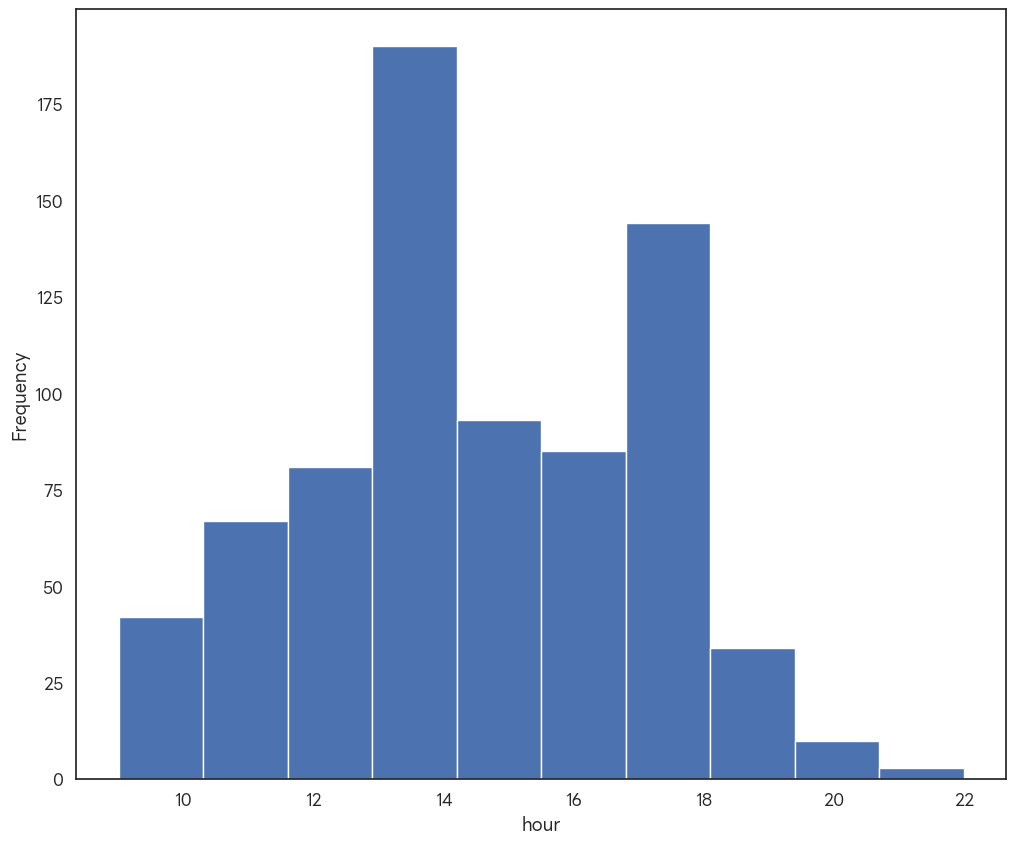

In [330]:
outlier_casual['hour'].plot(kind='hist', figsize=(12, 10))
plt.xlabel('hour')

- casual 컬럼에 대한 이상치 경우, 점심시간대와 출퇴근 시간 이외의 시간대에서의 이상치가 의심스럽긴 하다

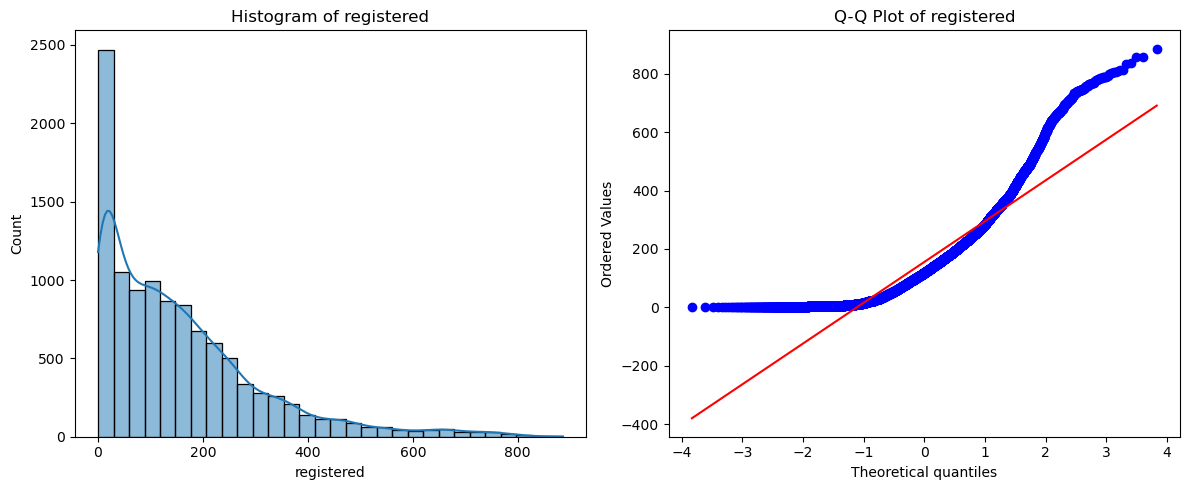

In [61]:
# 등록된 사용자의 대여 수애 따른 이상치 확인
plot_hist_qq(train,'registered')

In [62]:
outlier_registered = detect_outliers(train, "registered", method="IQR")
outlier_registered

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
1987,2,0,1,1,25.42,31.060,38,16.997900,59,539,598,17,9,5,2011
2011,2,0,1,1,26.24,31.060,33,0.000000,79,532,611,17,10,5,2011
2059,2,0,1,2,26.24,31.060,57,12.998000,54,540,594,17,12,5,2011
2179,2,0,1,1,25.42,30.305,65,27.999300,83,521,604,17,17,5,2011
2371,2,0,1,1,31.98,34.090,33,19.001200,63,516,579,17,6,6,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,4,0,1,1,16.40,20.455,47,12.799395,39,533,572,17,18,12,2012
10856,4,0,1,1,15.58,19.695,46,22.002800,13,512,525,18,18,12,2012
10870,4,0,1,1,9.84,12.880,87,7.001500,13,665,678,8,19,12,2012
10879,4,0,1,1,16.40,20.455,50,26.002700,26,536,562,17,19,12,2012


Text(0.5, 0, 'hour')

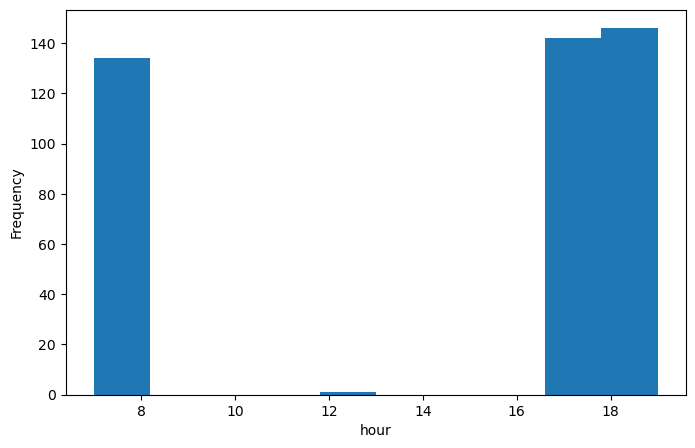

In [63]:
outlier_registered['hour'].plot(kind='hist', figsize=(8, 5))
plt.xlabel('hour')

- registered 컬럼에 대한 이상치 경우, 출퇴근 시간대라는 근거가 명확해보인다.

In [65]:
q1 = train['casual'].quantile(0.25)
q3 = train['casual'].quantile(0.75)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
upper_bound

116.5

In [66]:
train[(train['casual'] >116) & (train['hour'] >= 21)]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
2783,3,1,0,2,30.34,34.090,62,7.0015,195,262,457,21,4,7,2011
8244,3,1,0,1,34.44,40.150,53,8.9981,222,362,584,21,4,7,2012
8245,3,1,0,1,33.62,39.395,56,15.0013,175,327,502,22,4,7,2012


이상치 탐색을 위해 casual(비회원 대여량) 컬럼의 3사분위(Q3) 값이 116.5임을 확인하고, 밤 9시 이후(hour ≥ 21) 데이터를 출력한 결과, 해당 데이터는 모두 7월 4일(공휴일)이었다. 공휴일에는 야외 활동이 활발해 자전거 대여량이 증가할 수 있으므로, 이를 이상치가 아닌 정상 데이터로 판단하였다. 따라서, 해당 데이터를 삭제하지 않고 유지하기로 결정하였다

# 데이터 탐색

#### 특성들 간의 상관관계

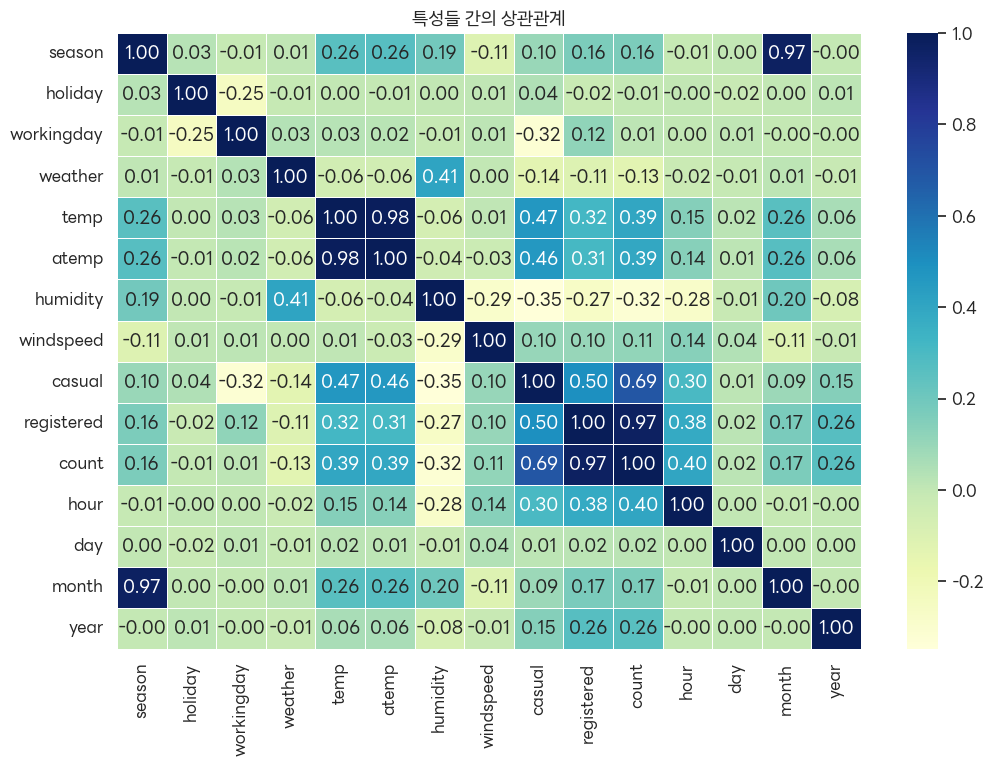

In [70]:
sns.set(font="LINE Seed Sans KR", rc={"axes.unicode_minus":False}, style='white',font_scale= 1.1)
plt.figure(figsize=(12, 8))
sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap='YlGnBu', linewidths=0.5)
plt.title('특성들 간의 상관관계')
plt.show()

<Axes: >

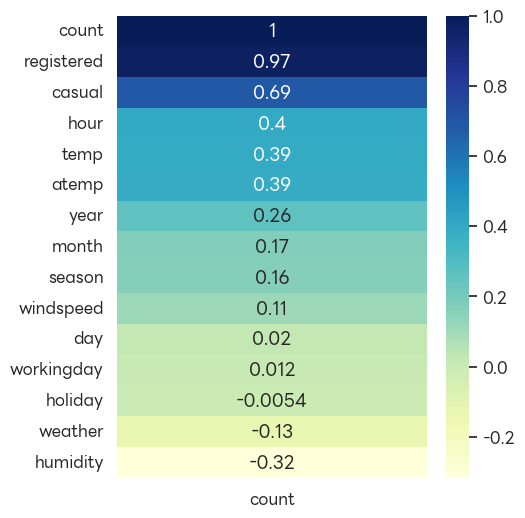

In [71]:
plt.figure(figsize= (5,6))
sns.heatmap(train.corr()[['count']].sort_values(by='count',ascending=False),annot=True, cmap='YlGnBu')

#### 시간대에 따른 자전거 대여수

/var/folders/g6/368p423d117c1pt_9pkjmw4w0000gn/T/ipykernel_21300/3807666736.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=train, x='hour', y='count', errorbar=None, palette='YlGnBu')


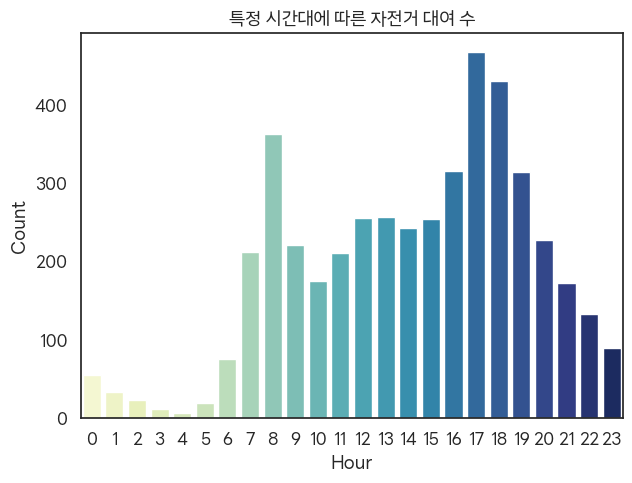

In [338]:
plt.figure(figsize=(7,5))
sns.barplot(data=train, x='hour', y='count', errorbar=None, palette='YlGnBu')
plt.xticks(ticks = range(0,24), labels=[f"{i}" for i in range(0,24)])
plt.title("특정 시간대에 따른 자전거 대여 수")
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

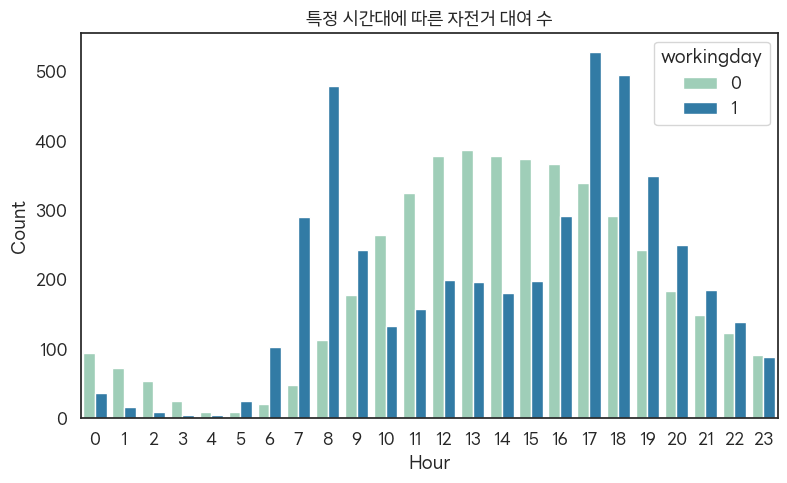

In [336]:
plt.figure(figsize=(9,5))
sns.barplot(data=train, x='hour', y='count', hue='workingday', errorbar=None, palette='YlGnBu')
plt.xticks(ticks = range(0,24), labels=[f"{i}" for i in range(0,24)])
plt.title("특정 시간대에 따른 자전거 대여 수")
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

#### 날씨/계절에 따른 자전거 대여 수요량

In [76]:
train['season'] = train['season'].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})
train['weather'] = train['weather'].map({1:"Sunny", 2:"Cloudy", 3:"Light_Rainy/Snowy", 4:"Heavy_Rainy/Snowy"})
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,Spring,0,0,Sunny,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,Spring,0,0,Sunny,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,Spring,0,0,Sunny,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,Spring,0,0,Sunny,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,Spring,0,0,Sunny,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


In [77]:
train.groupby('weather').describe()['count']

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
Cloudy,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
Heavy_Rainy/Snowy,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0
Light_Rainy/Snowy,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
Sunny,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0


Text(0.5, 1.0, '날씨,계절에 따른 자전거 대여 수요량')

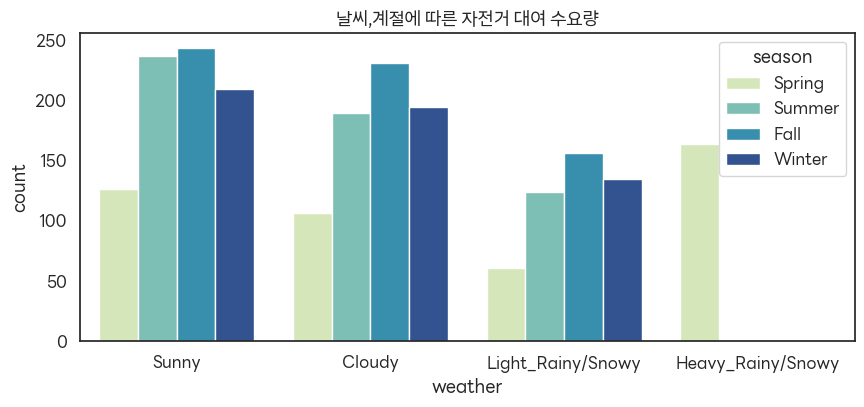

In [78]:
plt.figure(figsize=(10,4))
sns.barplot(x=train['weather'] ,y=train['count'], hue=train['season'], errorbar=None, palette='YlGnBu')
plt.xlabel("weather")
plt.ylabel("count")
plt.title("날씨,계절에 따른 자전거 대여 수요량")

In [79]:
train.groupby('season').describe()['count']

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
Spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
Summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
Winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


/var/folders/g6/368p423d117c1pt_9pkjmw4w0000gn/T/ipykernel_21300/387276040.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= train['season'] ,y = train['count'],errorbar=None, palette='YlGnBu')


Text(0.5, 1.0, '계절에 따른 자전거 대여 수요량')

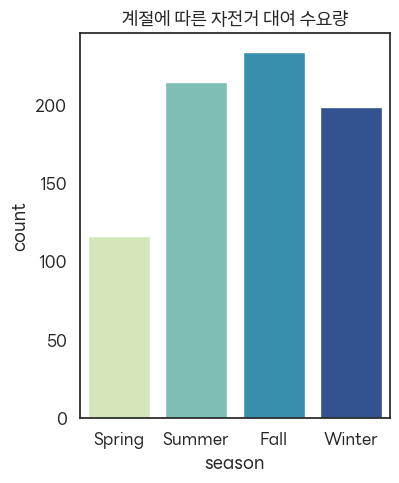

In [346]:
plt.figure(figsize=(4,5))
sns.barplot(x= train['season'] ,y = train['count'],errorbar=None, palette='YlGnBu')
plt.xlabel("season")
plt.ylabel("count")
plt.title("계절에 따른 자전거 대여 수요량")

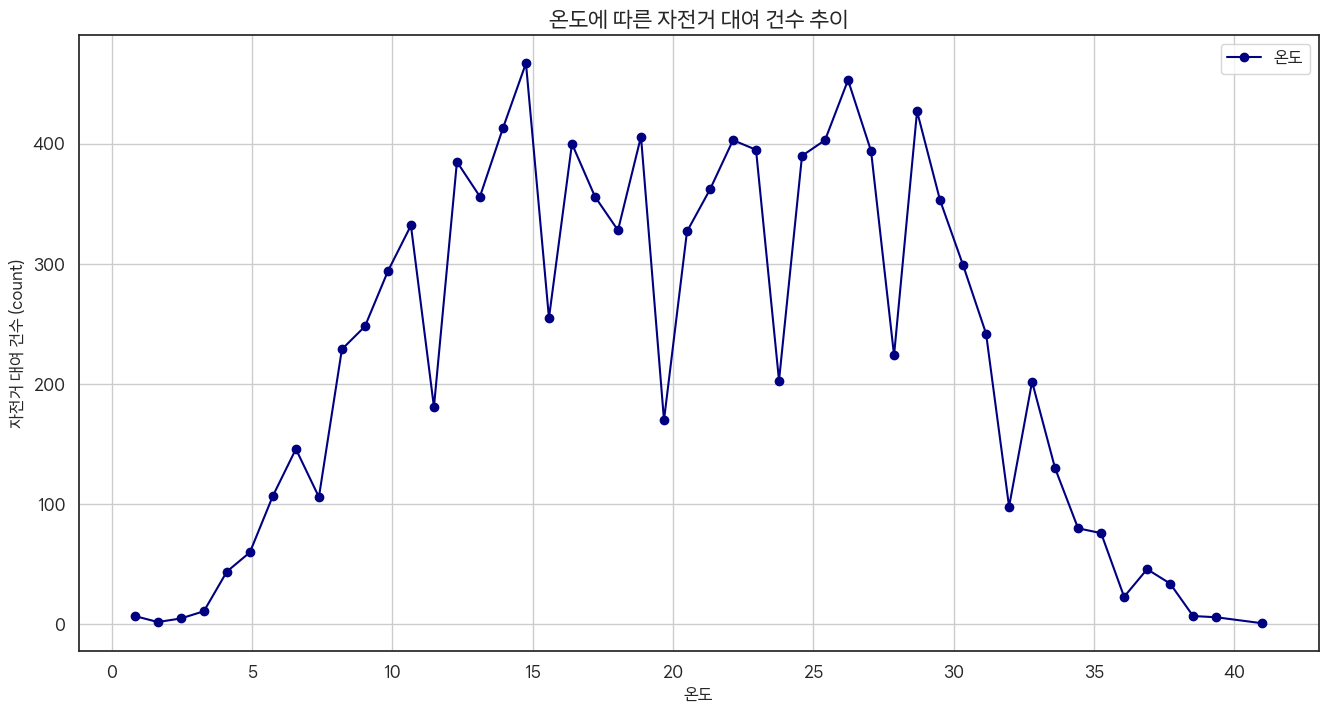

In [81]:
# 온도(temp)에 따른 대여 건수(행 개수) 계산
temp_count = train.groupby('temp').size().reset_index(name='count')

plt.figure(figsize=(16, 8))
plt.plot(temp_count['temp'], temp_count['count'], marker='o', label='온도', color='navy')
plt.title('온도에 따른 자전거 대여 건수 추이', fontsize=16)
plt.xlabel('온도', fontsize=12)
plt.ylabel('자전거 대여 건수 (count)', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# 모델링

## 인코딩


In [84]:
df = train.copy()

In [85]:
df = df[['season', 'holiday', 'workingday', 'weather', 'temp','humidity', 
         'windspeed','casual', 'registered','count', 'hour','day', 'month','year']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  object 
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  object 
 4   temp        10886 non-null  float64
 5   humidity    10886 non-null  int64  
 6   windspeed   10886 non-null  float64
 7   casual      10886 non-null  int64  
 8   registered  10886 non-null  int64  
 9   count       10886 non-null  int64  
 10  hour        10886 non-null  int32  
 11  day         10886 non-null  int32  
 12  month       10886 non-null  int32  
 13  year        10886 non-null  int32  
dtypes: float64(2), int32(4), int64(6), object(2)
memory usage: 1020.7+ KB


In [86]:
for col in ['season', 'holiday', 'workingday', 'weather', 'temp','humidity', 'windspeed', 'hour','day', 'month','year'] :
    
    print(f'-----{col}------')
    print(df[col].unique())
    print('-----------------')

-----season------
['Spring' 'Summer' 'Fall' 'Winter']
-----------------
-----holiday------
[0 1]
-----------------
-----workingday------
[0 1]
-----------------
-----weather------
['Sunny' 'Cloudy' 'Light_Rainy/Snowy' 'Heavy_Rainy/Snowy']
-----------------
-----temp------
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
-----------------
-----humidity------
[ 81  80  75  86  76  77  72  82  88  87  94 100  71  66  57  46  42  39
  44  47  50  43  40  35  30  32  64  69  55  59  63  68  74  51  56  52
  49  48  37  33  28  38  36  93  29  53  34  54  41  45  92  62  58  61
  60  65  70  27  25  26  31  73  21  24  23  22  19  15  67  10   8  12
  14  13  17  16  18  20  85   0  83  84  78  79  89  97  90  96  91]
-----------------
-----winds

In [149]:
df = pd.get_dummies(df, columns=["season", "weather", 'hour','month'],drop_first= True)
test = pd.get_dummies(test, columns=["season", "weather", 'hour','month'],drop_first= True)

In [151]:
df.head()

,holiday,workingday,temp,humidity,windspeed,casual,registered,count,day,year,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,9.84,81,0.0,3,13,16,1,2011,...,False,False,False,False,False,False,False,False,False,False
1,0,0,9.02,80,0.0,8,32,40,1,2011,...,False,False,False,False,False,False,False,False,False,False
2,0,0,9.02,80,0.0,5,27,32,1,2011,...,False,False,False,False,False,False,False,False,False,False
3,0,0,9.84,75,0.0,3,10,13,1,2011,...,False,False,False,False,False,False,False,False,False,False
4,0,0,9.84,75,0.0,0,1,1,1,2011,...,False,False,False,False,False,False,False,False,False,False


In [153]:
test.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,day,year,season_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,20,2011,False,...,False,False,False,False,False,False,False,False,False,False
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,20,2011,False,...,False,False,False,False,False,False,False,False,False,False
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,20,2011,False,...,False,False,False,False,False,False,False,False,False,False
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,20,2011,False,...,False,False,False,False,False,False,False,False,False,False
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,20,2011,False,...,False,False,False,False,False,False,False,False,False,False


## 데이터 분리

In [156]:
# (casual, registered 컬럼을 삭제한) 학습 데이터 생성
df = df.drop(columns=['casual', 'registered'])
df

,holiday,workingday,temp,humidity,windspeed,count,day,year,season_Spring,season_Summer,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,9.84,81,0.0000,16,1,2011,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,9.02,80,0.0000,40,1,2011,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,9.02,80,0.0000,32,1,2011,True,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,9.84,75,0.0000,13,1,2011,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,9.84,75,0.0000,1,1,2011,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,26.0027,336,19,2012,False,False,...,False,False,False,False,False,False,False,False,False,True
10882,0,1,14.76,57,15.0013,241,19,2012,False,False,...,False,False,False,False,False,False,False,False,False,True
10883,0,1,13.94,61,15.0013,168,19,2012,False,False,...,False,False,False,False,False,False,False,False,False,True
10884,0,1,13.94,61,6.0032,129,19,2012,False,False,...,False,False,False,False,False,False,False,False,False,True


In [158]:
test

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,day,year,season_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,20,2011,False,...,False,False,False,False,False,False,False,False,False,False
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,20,2011,False,...,False,False,False,False,False,False,False,False,False,False
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,20,2011,False,...,False,False,False,False,False,False,False,False,False,False
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,20,2011,False,...,False,False,False,False,False,False,False,False,False,False
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,20,2011,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,0,1,10.66,12.880,60,11.0014,31,2012,False,...,False,False,False,False,False,False,False,False,False,True
6489,2012-12-31 20:00:00,0,1,10.66,12.880,60,11.0014,31,2012,False,...,False,False,False,False,False,False,False,False,False,True
6490,2012-12-31 21:00:00,0,1,10.66,12.880,60,11.0014,31,2012,False,...,False,False,False,False,False,False,False,False,False,True
6491,2012-12-31 22:00:00,0,1,10.66,13.635,56,8.9981,31,2012,False,...,False,False,False,False,False,False,False,False,False,True


## 평가지표 함수

- 실제 타깃값 y_true와 예측값 y_pred를 인수로 전달하면 RMSLE 수치를 반환하는 함수이다.
- convertExp는 입력 데이터를 지수변환할지를 정하는 파라미터이다.
- 기본값인 convertExp=True를 전달하면 1)과 같이 y_true와 y_pred를 지수변환한다.
- 지수변환에는 numpy 내장함수인 exp()를 이용함
- 2)는 y_true와 y_pred를 로그변환하고 결측값은 0으로 변환한다.
- 참고로 np.log() 함수의 밑은 e이다.
- np.nan_to_num() 함수는 NaN 결측값을 모두 0으로 바꾸는 기능을 한다.
- 또한 np.log(y+1)은 간단히 np.log1p(y)로 표현하기도 한다.

In [161]:
def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [164]:
def evaluate_regression_model(test, prediction):
    print("MAE : ", mean_absolute_error(test, prediction))
    print("MSE : ", mean_squared_error(test, prediction))
    print("RMSE : ", root_mean_squared_error(test, prediction))

# Standard Scaler 스케일링 + 모델링

In [167]:
X = df.drop(columns=['count'])
y = df['count']
X.shape, y.shape

((10886, 47), (10886,))

In [169]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor

In [171]:
from sklearn.preprocessing import StandardScaler

In [173]:
ss = StandardScaler()

In [175]:
X_scaled_ss = ss.fit_transform(X)

In [177]:
X_scaled_ss

array([[-0.17149048, -1.46067232, -1.33366069, ..., -0.30220576,
        -0.30220576, -0.30238674],
       [-0.17149048, -1.46067232, -1.43890721, ..., -0.30220576,
        -0.30220576, -0.30238674],
       [-0.17149048, -1.46067232, -1.43890721, ..., -0.30220576,
        -0.30220576, -0.30238674],
       ...,
       [-0.17149048,  0.68461625, -0.80742813, ..., -0.30220576,
        -0.30220576,  3.30702336],
       [-0.17149048,  0.68461625, -0.80742813, ..., -0.30220576,
        -0.30220576,  3.30702336],
       [-0.17149048,  0.68461625, -0.91267464, ..., -0.30220576,
        -0.30220576,  3.30702336]])

In [179]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_ss, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 47), (2178, 47), (8708,), (2178,))

In [183]:
log_y_train = np.log(y_train) #타깃값 로그 변환
log_y_test = np.log(y_test) #타깃값 로그 변환

In [185]:
# 모델 생성
lr_model_ss = LinearRegression()
r_model_ss = Ridge()
l_model_ss = Lasso()
sgd_model_ss = SGDRegressor()

## Linear Regression

#### 모델 생성

In [189]:
lr_model_ss.fit(X_train, log_y_train)

LinearRegression()

In [191]:
lr_model_ss.coef_, lr_model_ss.intercept_

(array([-4.41616247e-03, -3.74129239e-02,  2.13173366e-01, -5.66787967e-02,
        -2.80797430e-02,  2.38382932e-02,  2.43964683e-01,  8.97827852e+11,
         2.45910646e+12,  1.30418374e+12, -8.29833432e-04, -1.39918691e-01,
         2.30624192e-02, -1.38395819e-01, -2.32991890e-01, -3.43554574e-01,
        -4.04930220e-01, -1.95108444e-01,  5.76913930e-02,  2.49447018e-01,
         3.81723297e-01,  3.12378995e-01,  2.47087958e-01,  2.70364605e-01,
         3.06303395e-01,  3.05292120e-01,  2.90211415e-01,  2.97921783e-01,
         3.53161231e-01,  4.32005264e-01,  4.18344702e-01,  3.63381375e-01,
         2.98750947e-01,  2.47822734e-01,  2.00699274e-01,  1.22125381e-01,
         5.35453940e-02,  7.46638293e-02, -9.92724661e+11, -9.94211961e+11,
        -9.94211961e+11,  5.76985959e+11,  5.76985959e+11,  5.76122811e+11,
        -2.56067734e+11, -2.56067734e+11, -2.56195395e+11]),
 4.55551579740905)

#### 검증

In [193]:
lr_model_ss.score(X_train, log_y_train)

0.8265180335551923

In [197]:
lr_ss_pred_train = lr_model_ss.predict(X_train)
lr_ss_pred_test = lr_model_ss.predict(X_test)

In [199]:
evaluate_regression_model(log_y_test,lr_ss_pred_test)

MAE :  0.45729049847095277
MSE :  0.38539973632770697
RMSE :  0.620805715443815


In [201]:
#RMSLE
rmsle(log_y_test, lr_ss_pred_test, True)

0.5833440933350813

## Ridge

### Ridge(최적의 파라미터 찾기 전)

#### 모델 생성

In [203]:
r_model_ss.fit(X_train, log_y_train)

Ridge()

In [205]:
r_model_ss.coef_, r_model_ss.intercept_

(array([-6.24677892e-03, -3.81381919e-02,  2.14232719e-01, -5.60706739e-02,
        -2.76198090e-02,  2.34109415e-02,  2.43893157e-01, -1.99393381e-01,
         3.96137417e-02,  7.41957517e-02, -3.05937764e-04, -1.39916039e-01,
         2.32427935e-02, -1.38940254e-01, -2.33500296e-01, -3.43718271e-01,
        -4.04730162e-01, -1.95316607e-01,  5.73843441e-02,  2.48646340e-01,
         3.80972921e-01,  3.11916509e-01,  2.47371533e-01,  2.69523512e-01,
         3.05267465e-01,  3.04889245e-01,  2.89891667e-01,  2.98078290e-01,
         3.52219054e-01,  4.31544497e-01,  4.17591769e-01,  3.62926535e-01,
         2.97955942e-01,  2.47137273e-01,  1.99664227e-01,  1.21374674e-01,
         5.32175077e-02,  7.47444139e-02, -2.09380522e-02,  4.70477703e-02,
         3.58590467e-02,  2.88233399e-02,  4.31811223e-02,  6.02156075e-02,
         4.98551076e-02,  3.89190422e-02,  2.74091384e-02]),
 4.552988483131913)

In [207]:
r_model_ss.score(X_train, log_y_train)

0.8265348078201389

#### 검증

In [210]:
r_ss_pred_train = r_model_ss.predict(X_train)
r_ss_pred_test = r_model_ss.predict(X_test)

In [212]:
evaluate_regression_model(log_y_test,r_ss_pred_test)

MAE :  0.45752830010639517
MSE :  0.3852356991276713
RMSE :  0.6206735850087961


In [214]:
#RMSLE
rmsle(log_y_test, r_ss_pred_test, True)

0.5832768185699083

### Ridge(최적의 파라미터 - GridSearchCV)

#### 모델 생성

In [218]:
# 최적의 파라미터 찾기 : GridSearchCV

In [220]:
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}
ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
ridge.fit(X_train, log_y_train)

print("최적의 하이퍼파라미터:", ridge.best_params_)
best_ridge = ridge.best_estimator_
print(best_ridge)

최적의 하이퍼파라미터: {'alpha': 0.1}
Ridge(alpha=0.1)


In [222]:
# 최적의 Ridge 모델 가져오기
print("Ridge 회귀 계수 (Weights):", best_ridge.coef_)
print("Ridge 절편 (Intercept):", best_ridge.intercept_)

Ridge 회귀 계수 (Weights): [-6.24406809e-03 -3.81395288e-02  2.14060419e-01 -5.59708349e-02
 -2.76453164e-02  2.34165238e-02  2.43938172e-01 -1.99534149e-01
  3.96425761e-02  7.41855510e-02 -3.09513714e-04 -1.39956630e-01
  2.32651759e-02 -1.38583623e-01 -2.33157908e-01 -3.43396097e-01
 -4.04412353e-01 -1.94975202e-01  5.77518252e-02  2.49036736e-01
  3.81380652e-01  3.12328039e-01  2.47785792e-01  2.69949286e-01
  3.05703498e-01  3.05332454e-01  2.90336844e-01  2.98525300e-01
  3.52671952e-01  4.31999113e-01  4.18040234e-01  3.63361319e-01
  2.98378867e-01  2.47548603e-01  2.00066056e-01  1.21764362e-01
  5.32813687e-02  7.48338652e-02 -2.09414353e-02  4.70537886e-02
  3.59015355e-02  2.88999818e-02  4.32546512e-02  6.02553779e-02
  4.98758747e-02  3.89071783e-02  2.73842723e-02]
Ridge 절편 (Intercept): 4.552990076444588


#### 예측 및 검증

In [361]:
ridge.score(X_train, log_y_train)

0.8265349106630215

In [225]:
ridge_pred_train = best_ridge.predict(X_train)
ridge_pred_test = best_ridge.predict(X_test)

In [227]:
evaluate_regression_model(log_y_test,ridge_pred_test)

MAE :  0.4575127877232669
MSE :  0.38522382747042616
RMSE :  0.6206640214080611


In [229]:
#RMSLE
rmsle(log_y_test, ridge_pred_test, True)

0.5832712708838009

## Lasso

### Lasso(최적의 파라미터 찾기 전)

#### 모델 생성

In [231]:
l_model_ss.fit(X_train, log_y_train)

Lasso()

In [233]:
l_model_ss.coef_, l_model_ss.intercept_

(array([-0., -0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,
        -0., -0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0., -0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., -0.]),
 4.555325159916083)

In [235]:
l_model_ss.score(X_train, log_y_train)

0.0

#### 검증

In [239]:
l_ss_pred_train = l_model_ss.predict(X_train)
l_ss_pred_test =l_model_ss.predict(X_test)

In [241]:
evaluate_regression_model(log_y_test,l_ss_pred_test)

MAE :  1.2032146180635095
MSE :  2.2709044947026222
RMSE :  1.5069520545467339


In [243]:
#RMSLE
rmsle(log_y_test, l_ss_pred_test, True)

1.4348375032624319

### Lasso(최적의 파라미터 - GridSearchCV)

#### 모델 생성

In [245]:
# 최적의 파라미터 찾기 : GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_lasso = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1]}

lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
lasso.fit(X_train, log_y_train)

print("최적의 하이퍼파라미터:", lasso.best_params_)
best_lasso = lasso.best_estimator_
print(best_lasso)

최적의 하이퍼파라미터: {'alpha': 0.0001}
Lasso(alpha=0.0001)


In [246]:
best_lasso = lasso.best_estimator_

print("Lasso 회귀 계수 (Weights):", best_lasso.coef_)
print("Lasso 절편 (Intercept):", best_lasso.intercept_)

Lasso 회귀 계수 (Weights): [-6.14995773e-03 -3.80088119e-02  2.14478784e-01 -5.60872659e-02
 -2.74480827e-02  2.33103981e-02  2.43802083e-01 -2.66003013e-01
  0.00000000e+00  4.96638129e-02 -2.31245334e-04 -1.39845881e-01
  2.31516516e-02 -1.39674397e-01 -2.34235844e-01 -3.44447712e-01
 -4.05476072e-01 -1.96046429e-01  5.64852735e-02  2.47763233e-01
  3.80102321e-01  3.11024093e-01  2.46460332e-01  2.68606063e-01
  3.04349332e-01  3.03961386e-01  2.88957514e-01  2.97143758e-01
  3.51291352e-01  4.30631794e-01  4.16678005e-01  3.62018548e-01
  2.97052265e-01  2.46233318e-01  1.98756134e-01  1.20470147e-01
  5.28266803e-02  7.43110269e-02 -3.87106641e-02  2.90607763e-02
  1.78422433e-02 -1.43404928e-02 -0.00000000e+00  1.69598137e-02
  2.22542264e-02  1.13778790e-02 -0.00000000e+00]
Lasso 절편 (Intercept): 4.552986569071433


#### 검증

In [363]:
lasso.score(X_train, log_y_train)

0.8265339050623912

In [250]:
lasso_pred_train = best_lasso.predict(X_train)
lasso_pred_test = best_lasso.predict(X_test)

In [252]:
evaluate_regression_model(log_y_test,lasso_pred_test)

MAE :  0.45754993954046286
MSE :  0.38525699280156067
RMSE :  0.6206907384531855


In [254]:
#RMSLE
rmsle(log_y_test, lasso_pred_test, True)

0.5832838747553961

## SGD Regressor

### SGD Regressor(최적의 파라미터 찾기 전)

#### 모델 생성

In [256]:
sgd_model_ss.fit(X_train, log_y_train)

SGDRegressor()

In [258]:
sgd_model_ss.coef_, sgd_model_ss.intercept_

(array([-1.89582497e+01,  1.97914755e+01, -1.31853306e+02,  1.25944362e+02,
         1.90423707e+00,  2.81214382e+00,  2.36054189e+01,  1.13809903e+02,
        -3.00143020e+01, -6.53346735e+01,  7.04160321e+04, -5.93092539e+01,
         3.50239752e+00, -4.92838828e+00, -1.68913363e+01, -1.54218964e+01,
        -2.65972351e+01, -2.84535397e+01, -2.26441042e+01, -2.76796876e+01,
        -1.15293812e+01, -8.53216221e+00,  1.09853839e+01,  2.45224140e+01,
         2.81426188e+01,  3.92526333e+01,  3.99576364e+01,  4.99596996e+01,
         5.01459730e+01,  4.20479992e+01,  4.83441961e+01,  1.94568483e+01,
         1.86069033e+01,  2.92042130e+00, -1.50094082e+00, -1.09240946e+00,
        -1.95860168e+02, -1.72860515e+02, -2.85945002e+01, -3.11110630e+01,
         1.26869330e+01,  1.34926448e+01, -6.07535242e-01, -4.07971776e+01,
        -8.71168196e+00, -3.06165631e+01, -6.29601059e+01]),
 array([683.5754638]))

In [260]:
sgd_model_ss.score(X_train, log_y_train)

-2814028843.7100534

#### 검증

In [264]:
sgd_ss_pred_train = sgd_model_ss.predict(X_train)
sgd_ss_pred_test =sgd_model_ss.predict(X_test)

In [266]:
evaluate_regression_model(log_y_test,sgd_ss_pred_test)

MAE :  150.66555288424385
MSE :  49048.89420651909
RMSE :  221.46984942993728


In [268]:
#RMSLE
rmsle(log_y_test, sgd_ss_pred_test, True)

/var/folders/g6/368p423d117c1pt_9pkjmw4w0000gn/T/ipykernel_21300/3621232564.py:5: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(y_pred)
/var/folders/g6/368p423d117c1pt_9pkjmw4w0000gn/T/ipykernel_21300/3621232564.py:12: RuntimeWarning: overflow encountered in square
  output = np.sqrt(np.mean((log_true - log_pred)**2))


inf

### SGB Regressor(최적의 파라미터 - GridSearchCV)

#### 모델 생성

In [271]:
# 최적의 파라미터 찾기 : GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_sgd = {
    'alpha': [0.0001, 0.001, 0.01], # 정규화 강도 (L1, L2 규제의 세기)
    'penalty': ['l1', 'l2'],    # 정규화 방식 선택 (Lasso vs Ridge)
    'learning_rate': ['constant', 'optimal', 'invscaling'] # 학습률 스케줄링 방식
}

sgd = GridSearchCV(SGDRegressor(max_iter=1000, tol=1e-3), param_grid_sgd, cv=5, scoring='r2', n_jobs=-1)
sgd.fit(X_train, log_y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/

GridSearchCV(cv=5, estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l1', 'l2']},
             scoring='r2')

In [357]:
best_sgd = sgd.best_estimator_
print("sgd 회귀 계수 (Weights):", best_sgd.coef_)
print("sgd 절편 (Intercept):", best_sgd.intercept_)

sgd 회귀 계수 (Weights): [ 0.         -0.03029063  0.26916463 -0.0671943  -0.00484829  0.01362529
  0.23158587 -0.19359781  0.          0.0825838   0.         -0.13059263
  0.         -0.21359456 -0.33030014 -0.45456897 -0.48763389 -0.30590366
 -0.02262305  0.12824374  0.25679884  0.20093466  0.11563806  0.13395438
  0.17411732  0.17212341  0.17206925  0.16642651  0.22898554  0.30645269
  0.29469176  0.24294444  0.17418818  0.13215107  0.08608146  0.
  0.          0.01493578 -0.01658545  0.02746585  0.         -0.01167918
  0.          0.01472026  0.          0.          0.        ]
sgd 절편 (Intercept): [4.55977744]


#### 검증

In [365]:
sgd.score(X_train, log_y_train)

0.8164013532415078

In [277]:
sgd_pred_train = sgd.predict(X_train)
sgd_pred_test =sgd.predict(X_test)

In [279]:
evaluate_regression_model(log_y_test,sgd_pred_test)

MAE :  0.47128431046496155
MSE :  0.40851715274759526
RMSE :  0.6391534657244653


In [281]:
#RMSLE
rmsle(log_y_test, sgd_pred_test, True)

0.6008910610687875

# 모델 평가

<성능>
- Linear, Ridge, Lasso 모델은 성능이 거의 동일하게 보여짐.
  : 데이터 자체가 선형 관계를 충분히 따르고 있음.
- SGD Regression은 다른 회귀 모델에 성능이 낮게 나타남

<최적 모델 선택>
- Linear, Ridge, Lasso 모두 성능 차이가 거의 없으므로, Linear Regression이 가장 간단하고 효율적.
- 하지만 과적합이 의심되기에, Ridge Regression 또는 Lasso Regression을 선택하는 것이 바람직함.


# 운영전략

<요일별 패턴 반영>
평일 :  회사 밀집 지역에 추가 배치 
주말 : 관광지나 공원 주변에 추가 배치

<시간대별 패턴 반영>
대여 수요가 적은 시간대에는 추가 할인을 제공하여 많은 이용을 유도
출퇴근 시간대에 수요가 높은 지역에 자전거를 추가 배치